In [1]:
# TODO

# Gerar um box de interesse
# Calculando os Tiles para o determinado Zoom
# Download dos dados de Tile de Vetor
# Analisar os dados

## Gerando box de interesse

In [12]:
import geopandas as gpd
import pandas as pd

In [13]:
areas = []
areas.append(gpd.read_file('zip://downloads/fwdenviodosshapefilesestudodecaladasdapompiae.zip!zona od pompeia.shp'))
areas.append(gpd.read_file('zip://downloads/fwdenviodosshapefilesestudodecaladasdapompiae.zip!zona od vila leopoldina.shp'))
gdf_areas = gpd.GeoDataFrame(pd.concat(areas))

In [19]:
print(gdf_areas.unary_union.bounds)

(322278.10529588326, 7396095.722869624, 328267.5011342565, 7397708.321301874)


## Calculando Tiles para um zoom de 14

In [20]:
import mercantile

In [30]:
gdf_areas.to_crs(epsg=4326).unary_union.bounds

(-46.74082388541877,
 -23.536289991520956,
 -46.68216990624233,
 -23.521244967840218)

In [37]:
tiles = [t for t in mercantile.tiles(*gdf_areas.to_crs(epsg=4326).unary_union.bounds, zooms=14)]


In [46]:
gpd.GeoDataFrame.from_features([mercantile.feature(t) for t in tiles])#.to_file('tmp/tiles.gpkg', driver='GPKG')

,geometry,title
0,"POLYGON ((-46.75781 -23.52370, -46.75781 -23.5...","XYZ tile Tile(x=6064, y=9293, z=14)"
1,"POLYGON ((-46.75781 -23.54385, -46.75781 -23.5...","XYZ tile Tile(x=6064, y=9294, z=14)"
2,"POLYGON ((-46.73584 -23.52370, -46.73584 -23.5...","XYZ tile Tile(x=6065, y=9293, z=14)"
3,"POLYGON ((-46.73584 -23.54385, -46.73584 -23.5...","XYZ tile Tile(x=6065, y=9294, z=14)"
4,"POLYGON ((-46.71387 -23.52370, -46.71387 -23.5...","XYZ tile Tile(x=6066, y=9293, z=14)"
5,"POLYGON ((-46.71387 -23.54385, -46.71387 -23.5...","XYZ tile Tile(x=6066, y=9294, z=14)"
6,"POLYGON ((-46.69189 -23.52370, -46.69189 -23.5...","XYZ tile Tile(x=6067, y=9293, z=14)"
7,"POLYGON ((-46.69189 -23.54385, -46.69189 -23.5...","XYZ tile Tile(x=6067, y=9294, z=14)"


<AxesSubplot:>

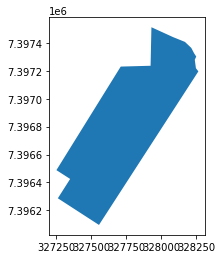

In [10]:
areas.plot()